In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("D:/Stream Project Sem 6/insurance3r2.csv")

In [3]:
df.head()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1


In [4]:
df.describe()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,5328.623318,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,2453.643236,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,3000.000000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,3008.000000,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,4007.000000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,8004.000000,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,10010.000000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   steps           1338 non-null   int64  
 4   children        1338 non-null   int64  
 5   smoker          1338 non-null   int64  
 6   region          1338 non-null   int64  
 7   charges         1338 non-null   float64
 8   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


### No missing values in the dataset

In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'steps', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [7]:
l = ['sex' , 'smoker' , 'region' , 'insuranceclaim']

In [8]:
for i in l:
          df['{}'.format(i)] = pd.Categorical(df['{}'.format(i)])

In [9]:
#df.info()

<AxesSubplot:xlabel='bmi', ylabel='Count'>

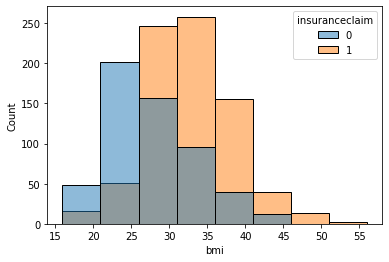

In [10]:
sns.histplot(x='bmi',hue='insuranceclaim',data=df, binwidth = 5)

<AxesSubplot:xlabel='age', ylabel='Count'>

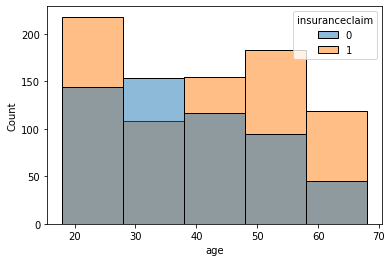

In [11]:
sns.histplot(x='age',hue='insuranceclaim',data=df, binwidth = 10)

<AxesSubplot:xlabel='smoker', ylabel='count'>

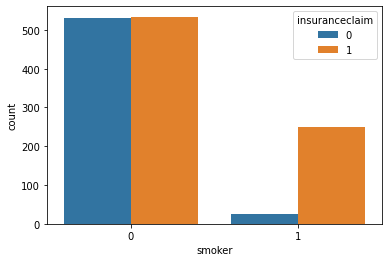

In [12]:
sns.countplot(x='smoker',hue='insuranceclaim',data=df)

<AxesSubplot:xlabel='smoker', ylabel='count'>

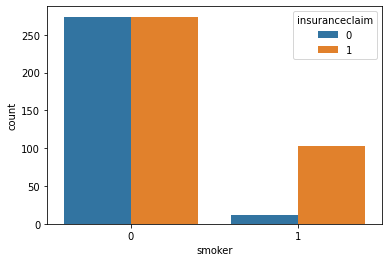

In [13]:
sns.countplot(x='smoker',hue='insuranceclaim',data=df[df.sex == 0])

<AxesSubplot:xlabel='smoker', ylabel='count'>

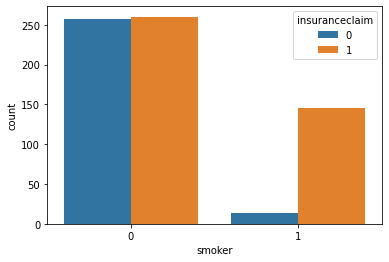

In [14]:
sns.countplot(x='smoker',hue='insuranceclaim',data=df[df.sex == 1])

<AxesSubplot:xlabel='charges', ylabel='Count'>

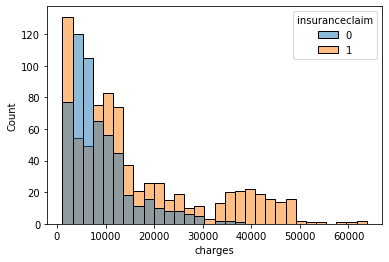

In [15]:
sns.histplot(x='charges',hue='insuranceclaim',data=df)

<AxesSubplot:xlabel='steps', ylabel='Count'>

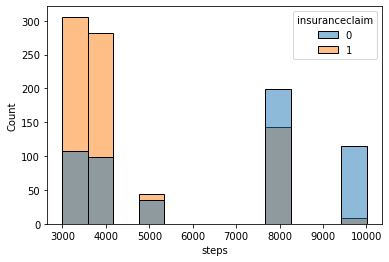

In [16]:
sns.histplot(x='steps',hue='insuranceclaim',data=df)

<AxesSubplot:xlabel='children', ylabel='count'>

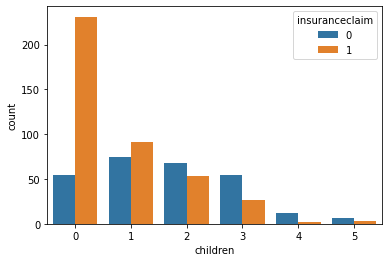

In [17]:
sns.countplot(x='children',hue='insuranceclaim',data=df[df.sex == 1])

In [18]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [19]:
X  = df.drop("insuranceclaim",axis = 1)
Y = df['insuranceclaim']

In [20]:
#X.head()
#y.head()

In [21]:
def scores(test, pred):
    precision = precision_score(test, pred)
    recall = recall_score(test, pred)
    f1 = f1_score(test, pred)
    accuracy = accuracy_score(test, pred)
    d = {}
    d['Precision']=precision
    d['Recall']=recall
    d['F1 Score'] = f1
    d['Accuracy'] = accuracy
    return(d)
    

### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)
classifier = LogisticRegression(solver='lbfgs',random_state=0, max_iter=300)
classifier.fit(X_train, Y_train)

LogisticRegression(max_iter=300, random_state=0)

In [24]:
Y_pred = classifier.predict(X_test)
scores(Y_test, Y_pred)

{'Precision': 0.8520408163265306,
 'Recall': 0.8978494623655914,
 'F1 Score': 0.87434554973822,
 'Accuracy': 0.8567164179104477}

In [25]:
LR = scores(Y_test, Y_pred)

In [26]:
LR

{'Precision': 0.8520408163265306,
 'Recall': 0.8978494623655914,
 'F1 Score': 0.87434554973822,
 'Accuracy': 0.8567164179104477}

### Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state = 0)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [28]:
Y_pred = model.predict(X_test)

In [29]:
RF = scores(Y_test, Y_pred)

In [30]:
RF

{'Precision': 0.9840425531914894,
 'Recall': 0.9946236559139785,
 'F1 Score': 0.9893048128342246,
 'Accuracy': 0.9880597014925373}

### Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 0)
model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [32]:
Y_pred = model.predict(X_test)
DT = scores(Y_test, Y_pred)

In [33]:
DT

{'Precision': 0.9946524064171123,
 'Recall': 1.0,
 'F1 Score': 0.9973190348525469,
 'Accuracy': 0.9970149253731343}

### Support Vector Machine

In [34]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf')
clf.fit(X_train, Y_train)

SVC()

In [35]:
Y_pred = clf.predict(X_test)
SV = scores(Y_test, Y_pred)

In [36]:
SV

{'Precision': 0.6835443037974683,
 'Recall': 0.8709677419354839,
 'F1 Score': 0.7659574468085106,
 'Accuracy': 0.7044776119402985}

### Gaussian NB

In [37]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, Y_train)

GaussianNB()

In [38]:
Y_pred = clf.predict(X_test)
GNB = scores(Y_test, Y_pred)

In [39]:
GNB

{'Precision': 0.8648648648648649,
 'Recall': 0.8602150537634409,
 'F1 Score': 0.8625336927223719,
 'Accuracy': 0.8477611940298507}

### Bernoulli NB

In [40]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, Y_train)

BernoulliNB()

In [41]:
Y_pred = clf.predict(X_test)
BNB = scores(Y_test, Y_pred)

In [42]:
BNB

{'Precision': 0.8092485549132948,
 'Recall': 0.7526881720430108,
 'F1 Score': 0.7799442896935933,
 'Accuracy': 0.764179104477612}

### Mixed Naive Bayes

In [43]:
from mixed_naive_bayes import MixedNB
clf = MixedNB()
clf.fit(X_train, Y_train)

[]


MixedNB(alpha=0.5, var_smoothing=1e-09)

In [44]:
Y_pred = clf.predict(X_test)
MNB = scores(Y_test, Y_pred)

In [45]:
MNB

{'Precision': 0.8648648648648649,
 'Recall': 0.8602150537634409,
 'F1 Score': 0.8625336927223719,
 'Accuracy': 0.8477611940298507}

### K-Nearest Neighbors

In [46]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(p=1,  n_neighbors= 5)
clf.fit(X_train, Y_train)

KNeighborsClassifier(p=1)

In [47]:
Y_pred = clf.predict(X_test)
KNN = scores(Y_test, Y_pred)

In [48]:
KNN

{'Precision': 0.6851851851851852,
 'Recall': 0.7956989247311828,
 'F1 Score': 0.736318407960199,
 'Accuracy': 0.6835820895522388}

In [49]:
Columns = ['Logistic Regression' , 'Random Forest' , 'Decision Tree' , 'SVM' , 'Gaussian NB' , 'Bernoulli NB' , 'Mixed NB' , 'K-Nearest Neighbor']

In [50]:
ind = ['Precision' , 'Recall' , 'F1 Score' , 'Accuracy']

In [51]:
results1 = pd.DataFrame(index = ind, columns = Columns)

In [52]:
#results

In [53]:
results1['Logistic Regression'] = LR.values()
results1['Random Forest'] = RF.values()
results1['Decision Tree'] = DT.values()
results1['SVM'] = SV.values()
results1['Gaussian NB'] = GNB.values()
results1['Bernoulli NB'] = BNB.values()
results1['Mixed NB'] = MNB.values()
results1['K-Nearest Neighbor'] = KNN.values()

In [54]:
results1

,Logistic Regression,Random Forest,Decision Tree,SVM,Gaussian NB,Bernoulli NB,Mixed NB,K-Nearest Neighbor
Precision,0.852041,0.984043,0.994652,0.683544,0.864865,0.809249,0.864865,0.685185
Recall,0.897849,0.994624,1.000000,0.870968,0.860215,0.752688,0.860215,0.795699
F1 Score,0.874346,0.989305,0.997319,0.765957,0.862534,0.779944,0.862534,0.736318
Accuracy,0.856716,0.988060,0.997015,0.704478,0.847761,0.764179,0.847761,0.683582


### Chi Square Test For Feature Selection

In [55]:
from sklearn.feature_selection import chi2
X  = df.drop("insuranceclaim",axis = 1)
Y = df['insuranceclaim']

In [56]:
chi_scores = chi2(X,Y)

In [57]:
chi_scores

(array([8.70584610e+01, 6.59594506e-01, 2.39343918e+02, 2.65846739e+05,
        2.97606944e+02, 1.18170897e+02, 4.69993111e-01, 1.41457988e+06]),
 array([1.05360339e-20, 4.16703134e-01, 5.46715509e-54, 0.00000000e+00,
        1.09432042e-66, 1.59074345e-27, 4.92990338e-01, 0.00000000e+00]))

In [58]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

<AxesSubplot:>

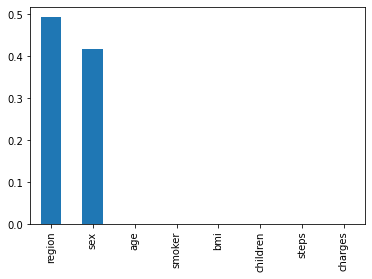

In [59]:
p_values.plot.bar()

### Since region and sex have higher p-value, it says that this variables is independent of the repsone and can not be considered for model training

In [60]:
X = df.drop(['region','sex','insuranceclaim'],axis=1)
Y = df['insuranceclaim']

In [62]:
#X.head()

### Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)
classifier = LogisticRegression(solver='lbfgs',random_state=0, max_iter=300)
classifier.fit(X_train, Y_train)

LogisticRegression(max_iter=300, random_state=0)

In [64]:
Y_pred = classifier.predict(X_test)
LR = scores(Y_test, Y_pred)

In [65]:
LR

{'Precision': 0.8492462311557789,
 'Recall': 0.9086021505376344,
 'F1 Score': 0.8779220779220779,
 'Accuracy': 0.8597014925373134}

### Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state = 0)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [67]:
Y_pred = model.predict(X_test)
RF = scores(Y_test, Y_pred)

In [68]:
RF

{'Precision': 0.9893048128342246,
 'Recall': 0.9946236559139785,
 'F1 Score': 0.9919571045576406,
 'Accuracy': 0.991044776119403}

### Decision Tree

In [69]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 0)
model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [70]:
Y_pred = model.predict(X_test)
DT = scores(Y_test, Y_pred)

In [71]:
DT

{'Precision': 0.9946524064171123,
 'Recall': 1.0,
 'F1 Score': 0.9973190348525469,
 'Accuracy': 0.9970149253731343}

### Support Vector Machine

In [72]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf')
clf.fit(X_train, Y_train)

SVC()

In [73]:
Y_pred = clf.predict(X_test)
SV = scores(Y_test, Y_pred)

In [74]:
SV

{'Precision': 0.6835443037974683,
 'Recall': 0.8709677419354839,
 'F1 Score': 0.7659574468085106,
 'Accuracy': 0.7044776119402985}

### Gaussian NB

In [75]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, Y_train)

GaussianNB()

In [76]:
Y_pred = clf.predict(X_test)
GNB = scores(Y_test, Y_pred)

### Bernoulli NB

In [77]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, Y_train)

BernoulliNB()

In [78]:
Y_pred = clf.predict(X_test)
BNB = scores(Y_test, Y_pred)

### Mixed Naive Bayes

In [79]:
from mixed_naive_bayes import MixedNB
clf = MixedNB()
clf.fit(X_train, Y_train)

[]


MixedNB(alpha=0.5, var_smoothing=1e-09)

In [80]:
Y_pred = clf.predict(X_test)
MNB = scores(Y_test, Y_pred)

### K-Nearest Neighbors

In [81]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(p=1,  n_neighbors= 5)
clf.fit(X_train, Y_train)

KNeighborsClassifier(p=1)

In [82]:
Y_pred = clf.predict(X_test)
KNN = scores(Y_test, Y_pred)

In [83]:
results = pd.DataFrame(index = ind, columns = Columns)

In [84]:
results['Logistic Regression'] = LR.values()
results['Random Forest'] = RF.values()
results['Decision Tree'] = DT.values()
results['SVM'] = SV.values()
results['Gaussian NB'] = GNB.values()
results['Bernoulli NB'] = BNB.values()
results['Mixed NB'] = MNB.values()
results['K-Nearest Neighbor'] = KNN.values()

In [85]:
results

,Logistic Regression,Random Forest,Decision Tree,SVM,Gaussian NB,Bernoulli NB,Mixed NB,K-Nearest Neighbor
Precision,0.849246,0.989305,0.994652,0.683544,0.864865,0.809249,0.864865,0.691589
Recall,0.908602,0.994624,1.000000,0.870968,0.860215,0.752688,0.860215,0.795699
F1 Score,0.877922,0.991957,0.997319,0.765957,0.862534,0.779944,0.862534,0.740000
Accuracy,0.859701,0.991045,0.997015,0.704478,0.847761,0.764179,0.847761,0.689552


In [86]:
results1

,Logistic Regression,Random Forest,Decision Tree,SVM,Gaussian NB,Bernoulli NB,Mixed NB,K-Nearest Neighbor
Precision,0.852041,0.984043,0.994652,0.683544,0.864865,0.809249,0.864865,0.685185
Recall,0.897849,0.994624,1.000000,0.870968,0.860215,0.752688,0.860215,0.795699
F1 Score,0.874346,0.989305,0.997319,0.765957,0.862534,0.779944,0.862534,0.736318
Accuracy,0.856716,0.988060,0.997015,0.704478,0.847761,0.764179,0.847761,0.683582
